# Interpolation, Smoothing and Fourier Spectra
This is a Jupyter notebook that takes you through basic interpolation, smoothing and fourier spectra demos in Python.

In [1]:
# First load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import xarray as xr

Load in and plot Atlanta monthly mean temperature data using pandas and matplotlib

In [ ]:
# Read temperature data
df=pd.read_csv("ATL_MonMeanTemp_1879_2020.csv")
df

In [ ]:
# extract data
atl=df.to_numpy()
year=df['Year'].to_numpy()
#
# number of data points = (# of year) x 12
N=np.size(year)*12
#
# count the number of months in data, and number of years
print(f'number of data points = {N}, i.e. {N/12} years')
time=year[0]+np.arange(0,N,1)/12

In [ ]:
# Plot the data 
alldata = df.to_numpy()
alltemp = alldata[:,1:].flatten()
plt.plot(time,alltemp,'k.')
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

## Interpolation

Lets pretend for a moment that we have data at irregular intervals, and we instead need it on a regular sampling interval. We can interpolate from the irregular to the regular interval using the scipy interp1d function

In [5]:
randints = np.sort(np.random.choice(N, int(N/4), replace=False))
randints = np.insert(randints,0,0) #these lines are required to make sure we have data at the beginning
randints = np.insert(randints,len(randints),N-1) #and the end
temp_irreg = alltemp[randints]
time_irreg = time[randints]
temp_interp_monthly = np.interp(time,time_irreg,temp_irreg) 

Text(0, 0.5, 'Atlanta monthly mean temp, deg F')

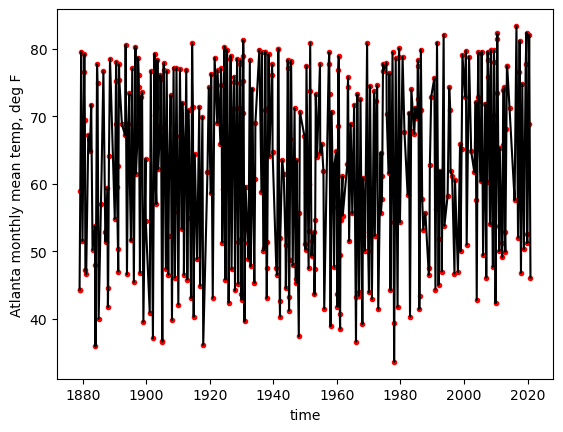

In [6]:
plt.plot(time_irreg,temp_irreg,'r.',label='Irregular Data')
plt.plot(time,temp_interp_monthly,'k-',label='Interpolated data')
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

But zooming in one can see that this sort of linear interpolation leads to problems

Text(0, 0.5, 'Atlanta monthly mean temp, deg F')

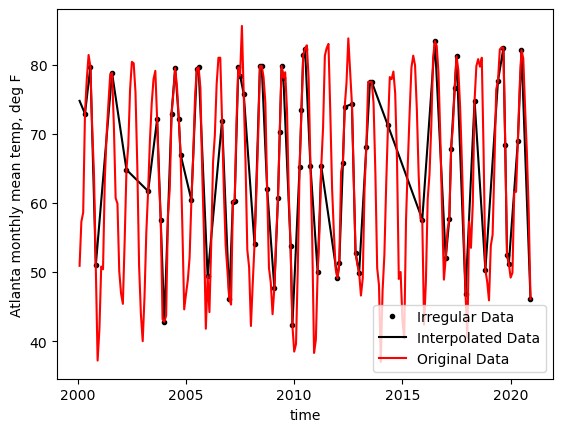

In [7]:
plt.plot(time_irreg[time_irreg>2000],temp_irreg[time_irreg>2000],'k.',label='Irregular Data')
plt.plot(time[time>2000],temp_interp_monthly[time>2000],'k-',label='Interpolated Data')
plt.plot(time[time>2000], alltemp[time>2000],'r-',label='Original Data')
plt.legend()
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

## Smoothing
Lets say now that I wanted to do some smoothing from data that was very noisy. The most basic kind of smoothing is a boxcar (moving average), but the scipy.signals.windows library has all sorts of different "kernels" for smoothing/convolution

In [14]:
window = scipy.signal.windows.boxcar(12)
temp_boxfilt = scipy.signal.convolve(alltemp, window, mode='same') / sum(window)

This is a 12-month boxcar window filter, which removes all the seasonality in temperature (averages over a year's worth of data), but it has problems near the edges of the data

Text(0, 0.5, 'Atlanta monthly mean temp, deg F')

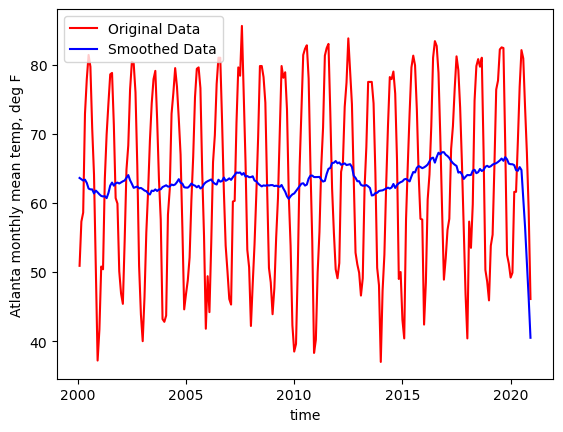

In [15]:
plt.plot(time[time>2000], alltemp[time>2000],'r-',label='Original Data')
plt.plot(time[time>2000], temp_boxfilt[time>2000],'b-',label='Smoothed Data')
plt.legend()
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

Data filtered in this way is useful for separating seasonality or other periodic signals from non-periodic signals, common in Earth Sci

Text(0, 0.5, 'Atlanta monthly mean temp, deg F')

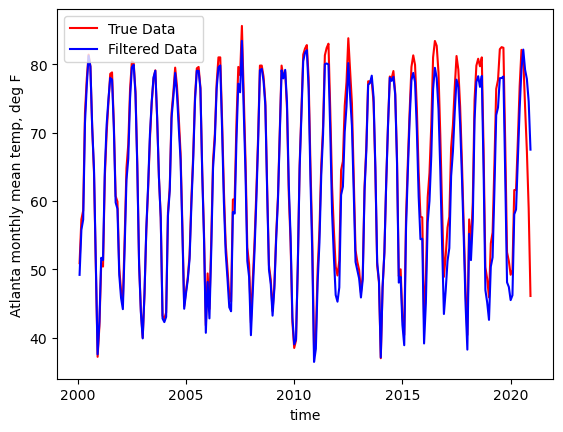

In [16]:
plt.plot(time[time>2000], alltemp[time>2000],'r-',label='True Data')
plt.plot(time[time>2000], alltemp[time>2000] - temp_boxfilt[time>2000] + np.mean(alltemp),'b-',label='Filtered Data')
plt.legend()
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

Or you could just calculate an annual climatology from the original formatted data

Text(0, 0.5, 'Atlanta monthly mean temp, deg F')

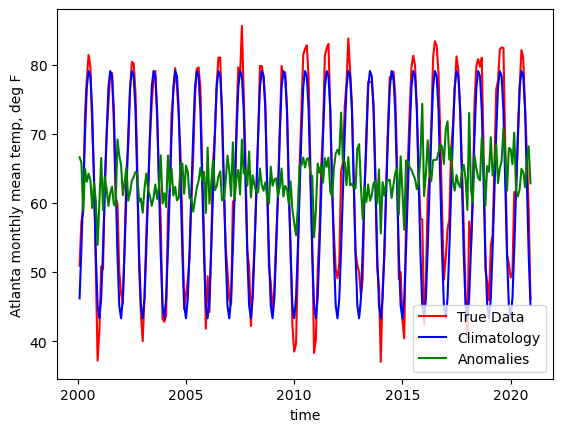

In [17]:
temp_clim = df.mean(axis=0).to_numpy()
temp_clim = np.tile(temp_clim[1:],int(N/12))
temp_climanom = alltemp - temp_clim

plt.plot(time[time>2000], alltemp[time>2000],'r-',label='True Data')
plt.plot(time[time>2000], temp_clim[time>2000],'b-',label='Climatology')
plt.plot(time[time>2000], temp_climanom[time>2000] + np.mean(alltemp),'g-',label='Anomalies')

plt.legend()
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

## Fourier Spectra
We can use the fft library in numpy to calculate fourier coefficients efficiently. Apply FFT to the Atlanta temperature data after first subtracting the long term mean temperature

In [20]:
temp_ltm = np.mean(alltemp)
temp_anom= alltemp - temp_ltm
c = np.fft.fft(temp_anom)
Nc = np.size(c)
c

array([ 6.05382411e-12  +0.j        ,  3.60401525e+02+328.14991679j,
        3.26569887e+02+824.48572331j, ..., -8.45681915e+01 -50.09144961j,
        3.26569887e+02-824.48572331j,  3.60401525e+02-328.14991679j])

Set sampling freqeuncy, dt

In [21]:
dt = 1/12
T = N*dt # period in the units of years

Calculate frequencies corresponding to fft coefficients

/var/folders/_f/n4gkyxq96qg_qlxhm9s9t78c00xmln/T/ipykernel_7065/646481001.py:2: RuntimeWarning: divide by zero encountered in divide
  per = 1/freq


Text(0.5, 0, 'indices of FFT coeffs')

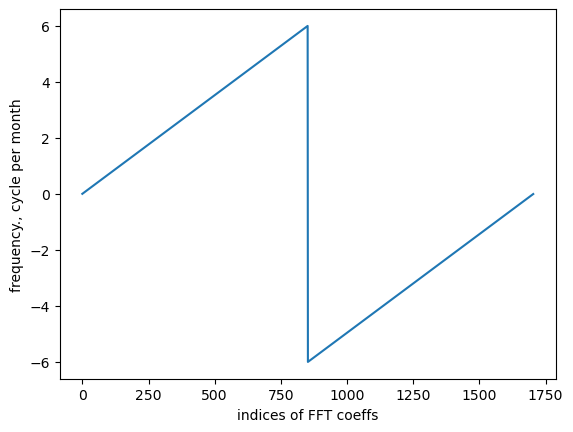

In [22]:
freq = np.fft.fftfreq(N,dt)
per = 1/freq
#
plt.plot(freq)
plt.ylabel('frequency., cycle per month')
plt.xlabel('indices of FFT coeffs')

Plot the power spectral density

Text(0.5, 0, 'frequency, cycle per year')

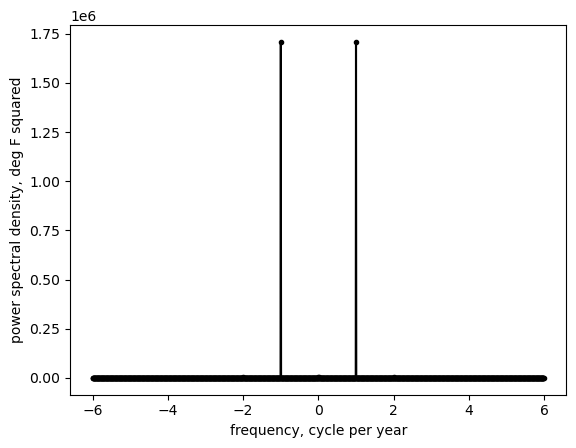

In [23]:
plt.plot(freq,np.abs(c)**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per year')

Just taking the 1/2 of the data and multiply by 2

Text(0.5, 0, 'frequency, cycle per year')

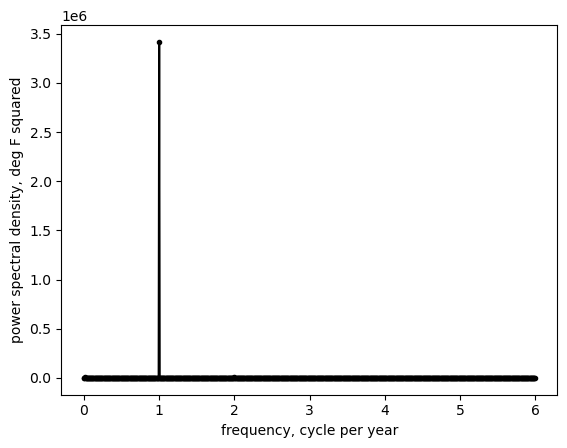

In [24]:
plt.plot(freq[:int(N/2)],2*np.abs(c[:int(N/2)])**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per year')

Inverse FFT to go back to real space and plot

/Users/arobel3/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'recon. Atlanta temp anomaly, deg F')

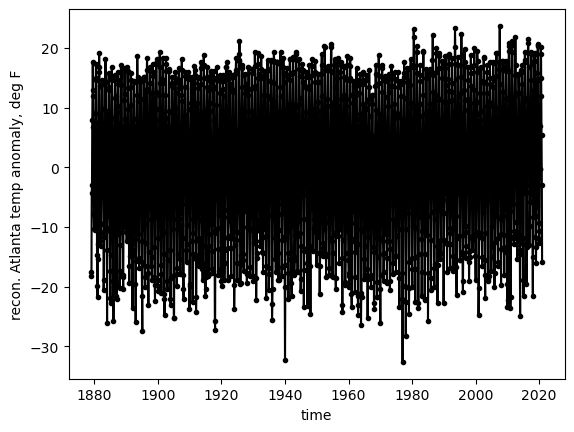

In [25]:
data_reconstructed = np.fft.ifft(c)
plt.plot(time,data_reconstructed,'k.-')
plt.xlabel('time')
plt.ylabel('recon. Atlanta temp anomaly, deg F')

## Filter out seasonality
We can also use the fft to filter out specific frequencies or ranges of frequencies from the data and plot the resulting PSD

Text(0.5, 0, 'frequency, cycle per year')

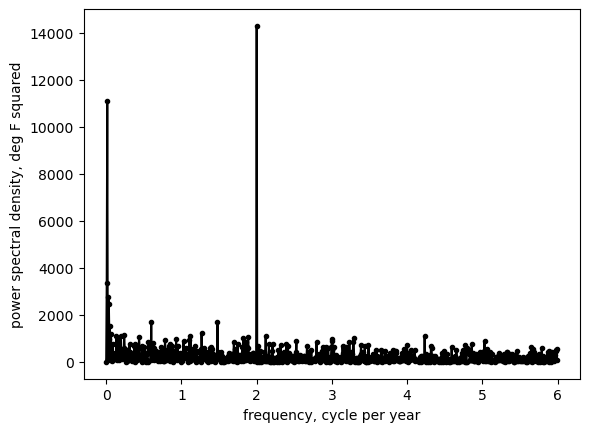

In [26]:
seas = abs(freq)==1 # Filter out seasonality, frequency = 1
c_filt = c.copy() # copy the Fourier coefficient
c_filt[seas]=0 # remove the seasonal cycle

plt.plot(freq[:int(N/2)],2*np.abs(c_filt[:int(N/2)])**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per year')

Now use inverse FFT to go back to time domain and plot the result

Text(0, 0.5, 'filtered Atlanta temp anomaly, deg F')

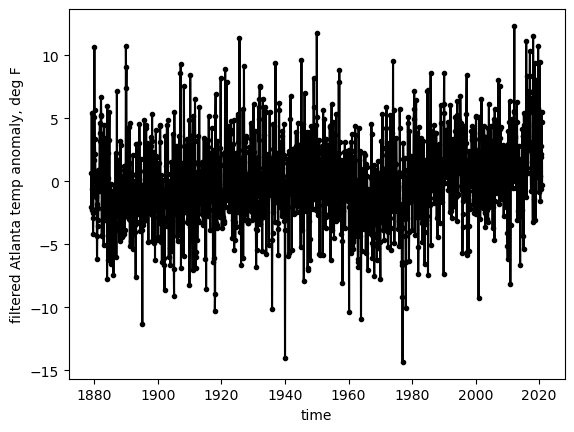

In [27]:
data_filt = np.fft.ifft(c_filt)

plt.plot(time,data_filt,'k.-')
plt.xlabel('time')
plt.ylabel('filtered Atlanta temp anomaly, deg F')

## Filter out high-frequency variability
    - Retain low-frequency component only
    - Set cutoff frequency (2 year)
    - Remove all frequency > 1/2 year
    - Plot the power spectral density

Text(0.5, 0, 'frequency, cycle per year')

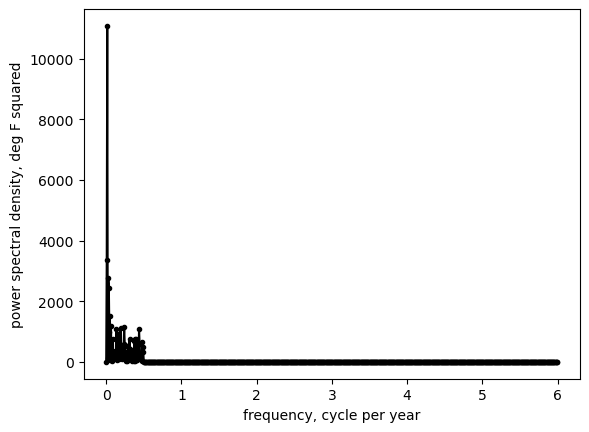

In [29]:
hf = abs(freq)>=1/2 # Apply filter 
c_filt = c.copy() # copy the Fourier coefficient
c_filt[hf]=0 # remove the seasonal cycle

plt.plot(freq[:int(N/2)],2*np.abs(c_filt[:int(N/2)])**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per year')

Inverse FFT to go back to real space and plot result

Text(0, 0.5, 'filtered Atlanta temp anomaly, deg F')

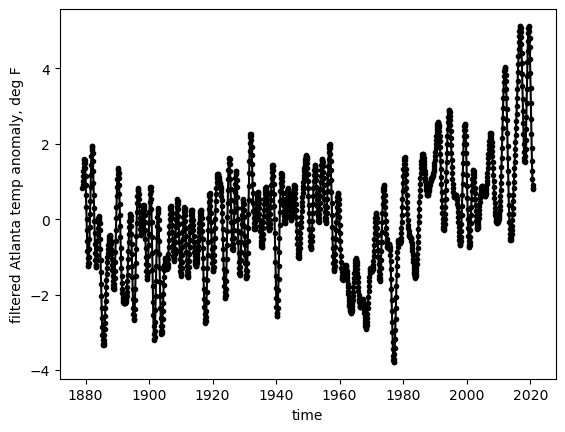

In [30]:
data_filt = np.fft.ifft(c_filt)

plt.plot(time,data_filt,'k.-')
plt.xlabel('time')
plt.ylabel('filtered Atlanta temp anomaly, deg F')